In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

#To plot the graph embedded in the notebook
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df = pd.read_csv(os.path.join(dirname, filename))

/kaggle/input/the-boston-houseprice-data/boston.csv


**Input features in order:**
1) CRIM: per capita crime rate by town <br>
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.<br>
3) INDUS: proportion of non-retail business acres per town<br>
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]<br>
6) RM: average number of rooms per dwelling<br>
7) AGE: proportion of owner-occupied units built prior to 1940<br>
8) DIS: weighted distances to five Boston employment centres<br>
9) RAD: index of accessibility to radial highways<br>
10) TAX: full-value property-tax rate per $10,000 [$/10k]<br>
11) PTRATIO: pupil-teacher ratio by town<br>
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
13) LSTAT: % lower status of the population<br>

**Output variable:**
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Our variables vary quite a lot so we definitely need to perform some form of feature scaling here. However, we'll just train a model without the feature scaling first.

<Figure size 720x432 with 0 Axes>

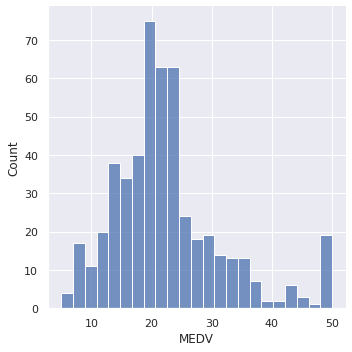

In [4]:
plt.figure(figsize=(10, 6))
sns.displot(df['MEDV'])

The distribution for medv follows a normal distribution with a few outliers mostly around 50. 

## **Prepare training and test data**

In [5]:
# features
X = df.iloc[:,:-1]

# labels
target = df.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=5)

In [7]:
# calculating p values of each feature.
f = f_regression(X_train,y_train)[1]
f.round(6)

array([0.      , 0.      , 0.      , 0.000995, 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      ])

In [8]:
model = LinearRegression()

model.fit(X_train,y_train)

# r-squared score
r_sq = round(model.score(X_train,y_train),2)
print(f"R-squared score for initial model {r_sq}")
adj_r = 1 - ( 1- r_sq ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print(f"Adjusted R-squared score for initial model {adj_r}")

print("------------------------------------------------------------------------")
# coefficients
coef = model.coef_
print(f"Coefficients for initial model {coef}")

b = model.intercept_
print(f"Bias for scaled model {b}")

R-squared score for initial model 0.74
Adjusted R-squared score for initial model 0.7313333333333334
------------------------------------------------------------------------
Coefficients for initial model [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]
Bias for scaled model 37.91248700975004


Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

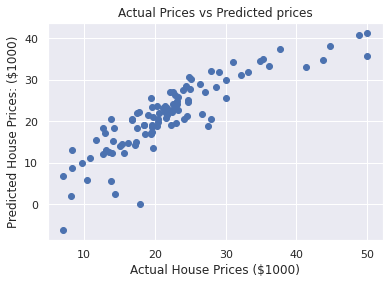

In [9]:
y_pred = model.predict(X_test)

# LETS PLOT!
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")

## Model with feature scaling

There are many scaling methods. We'll use the standard scaler for this project which standardizes features by removing the mean and scales to unit variance

In [10]:
sc = StandardScaler().fit(X_train)

#  use only the training set to figure out how to scale / normalize
X_train_scaled = sc.transform(X_train)

# then blindly apply the same transform to the test set
X_test_scaled = sc.transform(X_test)

In [11]:
model_2 = LinearRegression()

model_2.fit(X_train_scaled,y_train)

# r-squared score
r_sq = round(model_2.score(X_train_scaled,y_train),2)
print(f"R-squared score for scaled model {r_sq}")
adj_r = 1 - ( 1- r_sq ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train_scaled.shape[1] - 1 )
print(f"Adjusted R-squared score for scaled model {adj_r}")

print("---------------------------------------------------------------------------------------")
# coefficients
coef = model_2.coef_
print(f"Coefficients for scaled model {coef}")

b = model_2.intercept_
print(f"Bias for scaled model {b}")

R-squared score for scaled model 0.74
Adjusted R-squared score for scaled model 0.7313333333333334
---------------------------------------------------------------------------------------
Coefficients for scaled model [-1.13502719  1.15814527  0.00737057  0.68709635 -1.82837001  2.36271879
  0.03166538 -3.06632775  3.16621482 -2.21457852 -2.08600876  1.0449511
 -4.17627077]
Bias for scaled model 22.646782178217823


Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

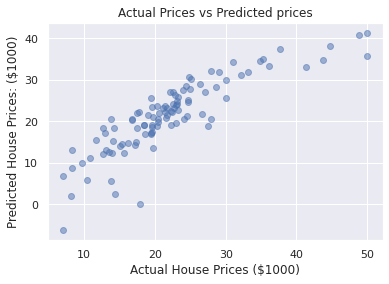

In [12]:
y_pred = model_2.predict(X_test_scaled)

# LETS PLOT!
plt.scatter(y_test, y_pred, alpha = .5)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.title("Actual Prices vs Predicted prices")

Text(0.5, 1.0, 'Residual pdf')

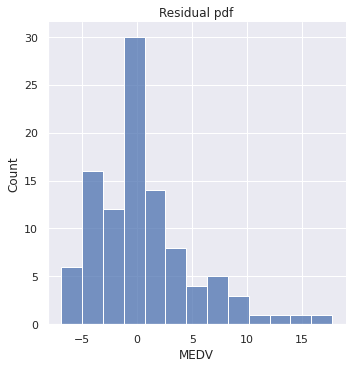

In [13]:
sns.displot(y_test-y_pred)
plt.title("Residual pdf")

In [14]:
y_pred

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577,
        5.85803701, 27.53708506, 31.81019188, 26.35634771, 22.77208748,
       31.91183048, 21.50224061, 23.70119983, 33.3622504 , 28.51633591,
       14.39456899,  0.19284025, 18.66247155, 13.71004139, 14.13408635,
        2.03263952, 19.7280831 , 38.18657429, 24.19760058, 31.30247973,
       11.14144544, 25.03636951, 23.27970871, 22.49420127, 20.52972594,
       15.16513744,  6.92553586, 18.3557733 , 22.37179804, 28.91287973,
       19.02980786, 30.19357214,  8.74384915, 40.86691522, 34.53763591,
       20.70224878,  2.59618963, 29.99590282, 12.15704798, 27.10186397,
       30.8052437 , -6.24169079, 19.84885777, 20.92973441, 12.43523958,
       20.4949947 , 19.19231742, 23.69073157, 12.67998473, 17.14252424,
       25.04649176, 34.77758126, 15.23294903, 28.22306193, 21.08745388,
       20.39506129, 25.79476888, 14.72463673, 33.18635032, 23.17771307,
       13.11057248, 19.23154617, 24.61162961, 21.50327036, 22.00

In [15]:
res =  pd.DataFrame(y_test)
res.rename(columns={"MEDV":"Target"}, inplace = True)

res['Predicted'] = y_pred
res["Difference"] = (res["Target"] - res['Predicted'])
res.reset_index(drop=True)

,Target,Predicted,Difference
0,37.6,37.563118,0.036882
1,27.9,32.144451,-4.244451
2,22.6,27.065736,-4.465736
3,13.8,5.670806,8.129194
4,35.2,35.099826,0.100174
...,...,...,...
97,26.6,21.912956,4.687044
98,22.4,22.394774,0.005226
99,13.1,13.193354,-0.093354
100,23.0,23.969911,-0.969911


In [16]:
res.describe()

,Target,Predicted,Difference
count,102.000000,102.000000,102.000000
mean,22.081373,21.498551,0.582821
std,8.892078,8.737521,4.553337
min,7.000000,-6.241691,-6.902249
25%,16.900000,17.054599,-2.510220
50%,21.300000,21.502755,0.021054
75%,24.775000,26.888389,2.226822
max,50.000000,41.361328,17.707160
